In [5]:
import pandas as pd
import numpy as np
CITY = 'nyc'
STATE = 'ny'


def get_filepath(state):
    return '../data/{state}/'.format(state=state)
def get_filepath_city(city):
    return '../data/' + city + '-bike/'
tot = 0
for STATE in ['ny', 'il', 'ma', 'dc', 'pa']:
    data = pd.read_csv(get_filepath(STATE) + f'{STATE}_preprocessed_data.csv')

    test_data = data.loc[data['year'] == 2022]
    print(len(test_data), STATE)
    tot+= len(test_data)

print(tot)


1959 ny
814 il
246 ma
269 dc
373 pa
3661


   Unnamed: 0  year        geoid  num_bikes  households  median_income  \
0           1  2013  36061009800          2        7105         104198   
1           2  2013  36061010000          3        1829          86156   
2           3  2013  36061010200          2         313         160729   
3           4  2013  36061010400          2        1031          98438   
4           5  2013  36061011300          4         204         124605   

   num_white  pct_white  num_black  pct_black  num_asian  pct_asian  inLimits  \
0       5876   0.827023        134   0.018860        988   0.139057      True   
1       1251   0.683980         49   0.026791        269   0.147075      True   
2        298   0.952077          8   0.025559          7   0.022364      True   
3        815   0.790495         11   0.010669         88   0.085354      True   
4         97   0.475490         16   0.078431         81   0.397059      True   

   inServiceArea  
0           True  
1           True  
2          

C:\Users\Walter\AppData\Local\Temp\ipykernel_33392\100784279.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


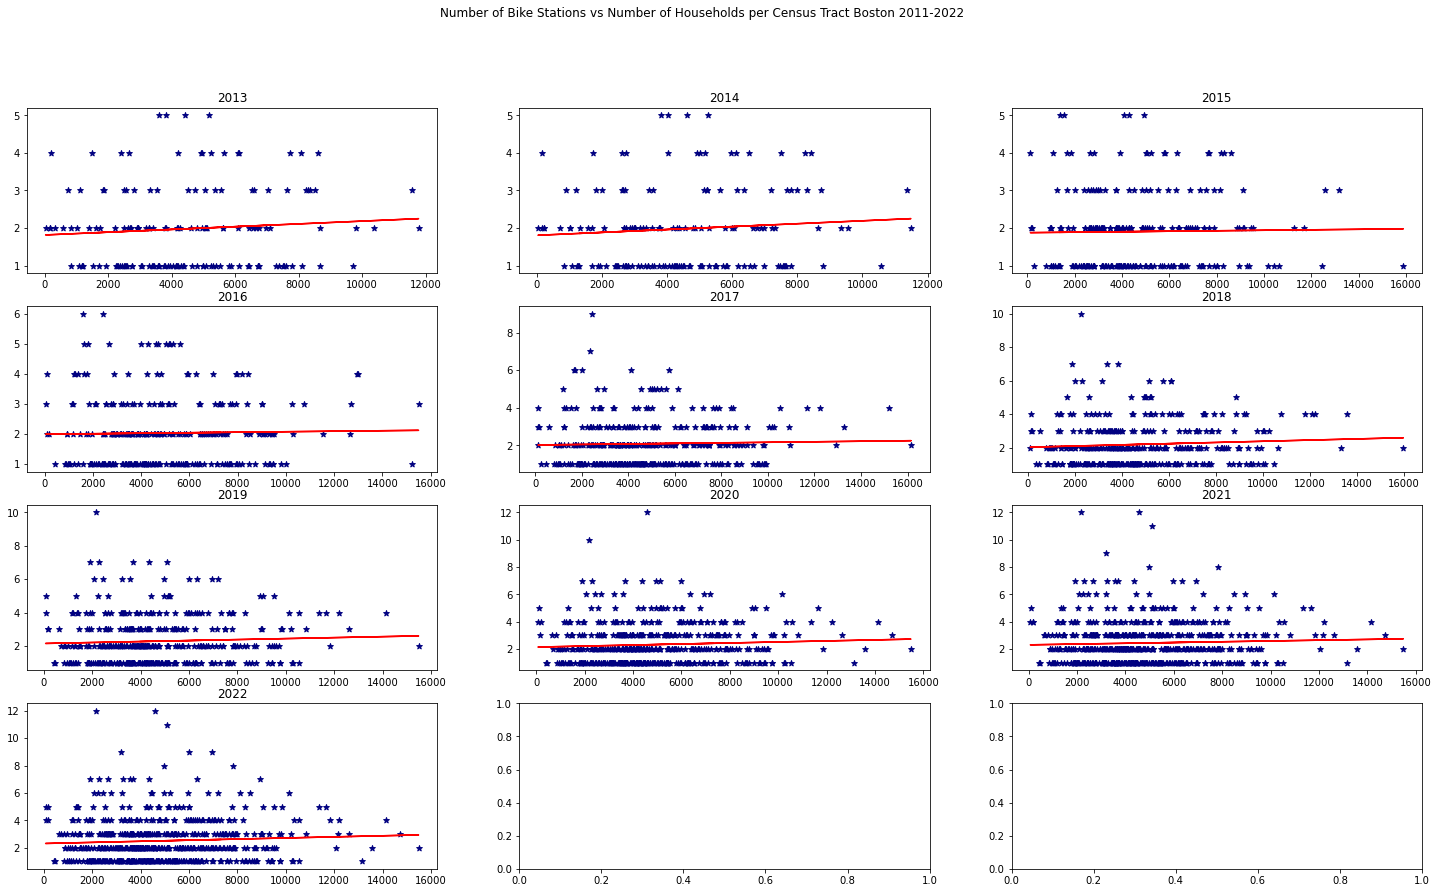

In [7]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 14))
years = list(range(2013, 2023))
y_count = 0
for i in range(4):
    for j in range(3):
        temp_data = data.loc[data['year'] == years[y_count]]
        print(temp_data.head())
        y = temp_data.num_bikes.tolist()
        x = temp_data['households'].tolist()
        to_use = temp_data.inServiceArea.tolist()
        y_axis = []
        x_axis = []
        for idx, val in enumerate(to_use):
            if val:
                y_axis.append(y[idx])
                x_axis.append(x[idx])

        #for normalized pct_white
        # avg_white = np.average(x_axis)
        # x_axis = [i - avg_white for i in x_axis]

        axs[i, j].scatter(x_axis, y_axis, marker = '*', color = 'navy')
        axs[i, j].set_title(years[y_count])

        # also for normalized pct_white
        # xabs_max = abs(max(axs[i, j].get_xlim(), key=abs))
        # axs[i, j].set_xlim(xmin=-xabs_max, xmax=xabs_max)

        a, b = np.polyfit(x_axis, y_axis, 1)
        axs[i, j].plot(x_axis, [a*x+b for x in x_axis], color = 'r')
        if years[y_count] == 2022:
            break
        y_count += 1


fig.suptitle('Number of Bike Stations vs Number of Households per Census Tract Boston 2011-2022')
plt.savefig(f'./plots/{CITY}/{CITY}_households.jpg',bbox_inches='tight', dpi=150)
fig.show()